In [33]:
from sklearn.datasets import make_blobs

# Ex. 1.1
X, y = make_blobs(n_samples=500, centers=1, n_features=2)

In [34]:
import numpy as np

# Ex. 1.2
projections  = []

for _ in range(5):
    vector = np.random.multivariate_normal(mean=[0, 0], cov=np.identity(2))
    unit_vector = vector / np.linalg.norm(vector)
    projections.append(unit_vector)

projected_data = [np.dot(X, proj) for proj in projections]

histograms = []
bin_edges = []
for proj in projected_data:
    hist, edges = np.histogram(proj, bins=10, range=(-8, 8))
    histograms.append(hist)
    bin_edges.append(edges)

probabilities = [hist / sum(hist) for hist in histograms]

def compute_anomaly_score(sample):
    projected_sample = [np.dot(sample, proj) for proj in projections]
    anomaly_scores = []
    for i, proj_val in enumerate(projected_sample):
        bin_index = np.digitize(proj_val, bin_edges[i]) - 1
        bin_index = min(max(bin_index, 0), len(probabilities[i]) - 1)
        probability = probabilities[i][bin_index]
        anomaly_scores.append(probability)
    return np.mean(anomaly_scores)

print("Anomaly score: ", compute_anomaly_score(X[0]))

Anomaly score:  0.44397924344330963


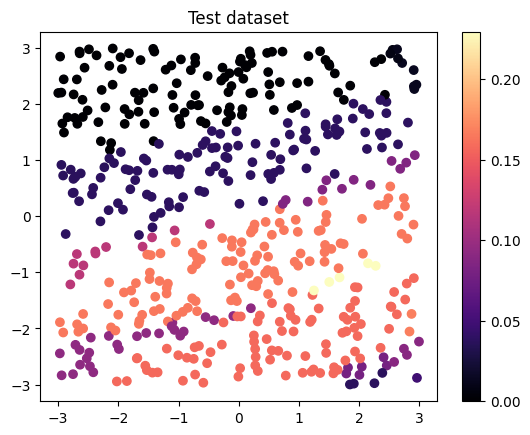

In [35]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Ex. 1.3
test_data = np.random.uniform(-3, 3, (500, 2))

anomaly_scores = np.array([compute_anomaly_score(sample) for sample in test_data])

norm = Normalize(vmin=anomaly_scores.min(), vmax=anomaly_scores.max())
scatter = plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores, cmap='magma', norm=norm)
plt.colorbar(scatter)
plt.title("Test dataset")
plt.show()

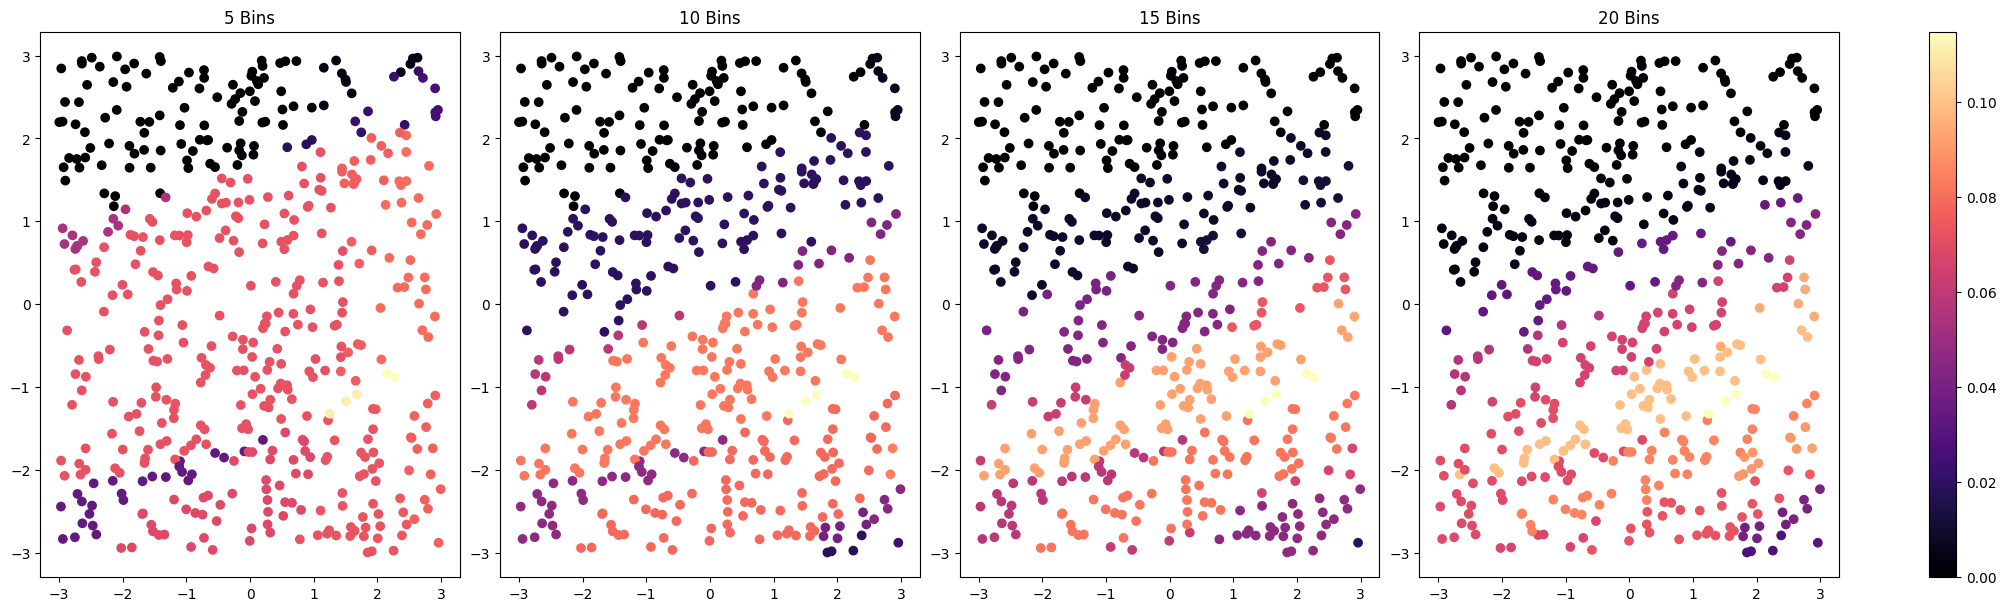

In [36]:
# Ex. 1.4
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

bin_counts = [5, 10, 15, 20]

fig, axes = plt.subplots(1, len(bin_counts), figsize=(20, 6), constrained_layout=True)

for i, bins in enumerate(bin_counts):
    histograms = []
    bin_edges = []
    for proj in projected_data:
        hist, edges = np.histogram(proj, bins=bins, range=(-8, 8))
        histograms.append(hist)
        bin_edges.append(edges)

    probabilities = [hist / sum(hist) for hist in histograms]

    anomaly_scores = np.array([compute_anomaly_score(sample) for sample in test_data])

    norm = Normalize(vmin=anomaly_scores.min(), vmax=anomaly_scores.max())
    scatter = axes[i].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores, cmap='magma', norm=norm)
    axes[i].set_title(f"{bins} Bins")

fig.colorbar(scatter, ax=axes, location='right')
plt.show()


In [37]:
# Ex. 2.1
X, y = make_blobs(n_samples=1000, centers=[(10, 0), (0, 10)])

In [38]:
from pyod.models.iforest import IForest

# Ex. 2.2
iforest = IForest(contamination=0.02)
iforest.fit(X)

test_data = np.random.uniform(-10, 20, (1000, 2))

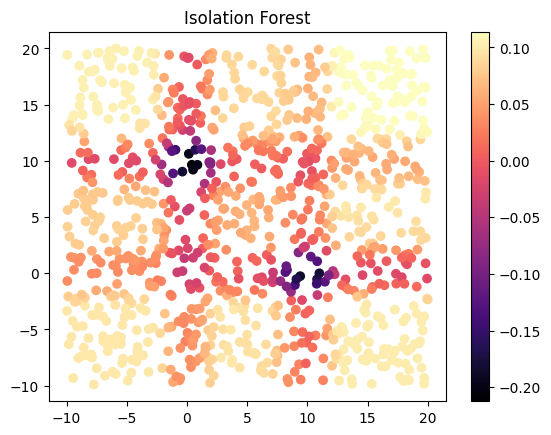

In [39]:
# Ex. 2.3
anomaly_scores_iforest = iforest.decision_function(test_data)

norm = Normalize(vmin=anomaly_scores_iforest.min(), vmax=anomaly_scores_iforest.max())
scatter = plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_iforest, cmap='magma', norm=norm)
plt.colorbar(scatter)
plt.title("Isolation Forest")
plt.show()

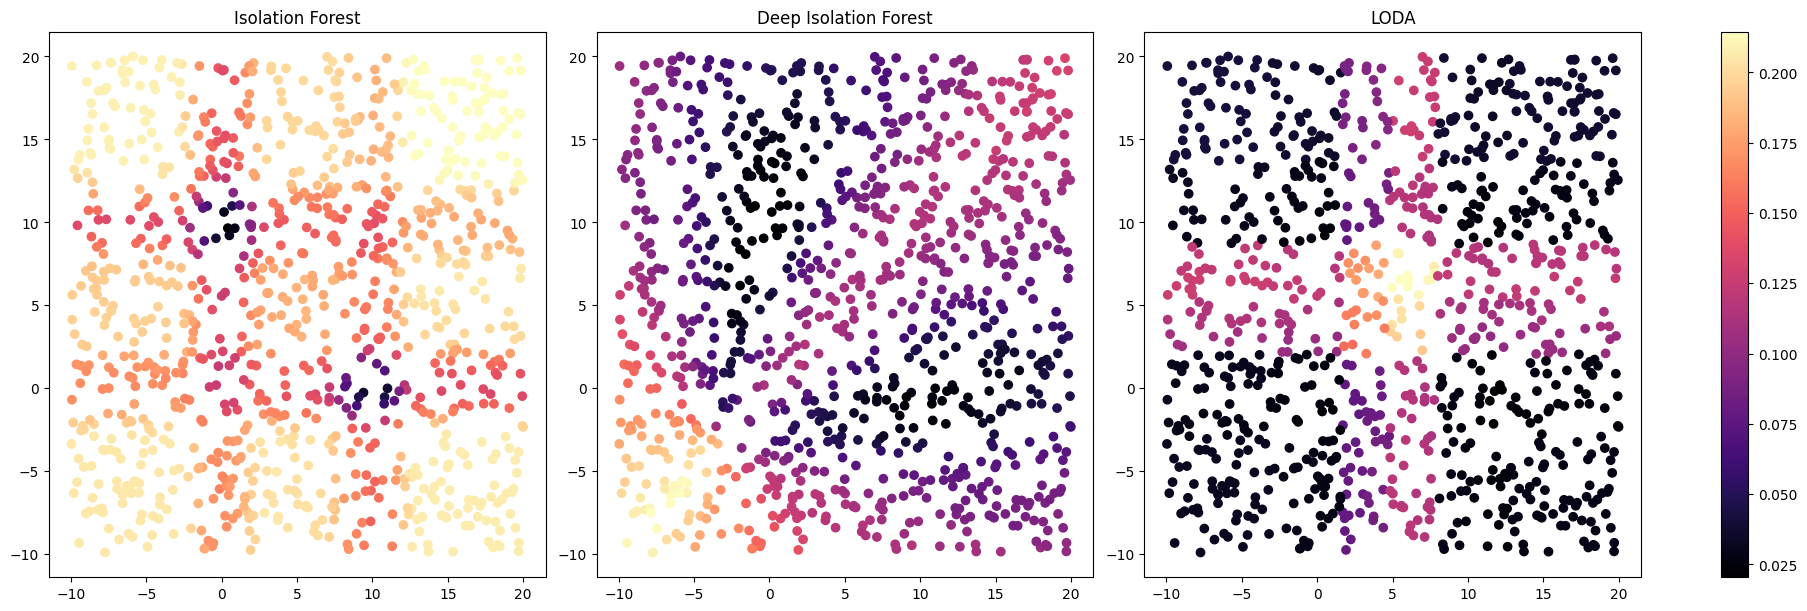

In [40]:
from pyod.models.dif import DIF
from pyod.models.loda import LODA

# Ex. 2.4
dif = DIF(contamination=0.02)
loda = LODA(contamination=0.02)

dif.fit(X)
loda.fit(X)

anomaly_scores_dif = dif.decision_function(test_data)
anomaly_scores_loda = loda.decision_function(test_data)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

norm = Normalize(vmin=anomaly_scores_iforest.min(), vmax=anomaly_scores_iforest.max())
scatter = axes[0].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_iforest, cmap='magma', norm=norm)
axes[0].set_title("Isolation Forest")

norm = Normalize(vmin=anomaly_scores_dif.min(), vmax=anomaly_scores_dif.max())
scatter = axes[1].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_dif, cmap='magma', norm=norm)
axes[1].set_title("Deep Isolation Forest")

norm = Normalize(vmin=anomaly_scores_loda.min(), vmax=anomaly_scores_loda.max())
scatter = axes[2].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_loda, cmap='magma', norm=norm)
axes[2].set_title("LODA")

fig.colorbar(scatter, ax=axes, location='right')
plt.show()

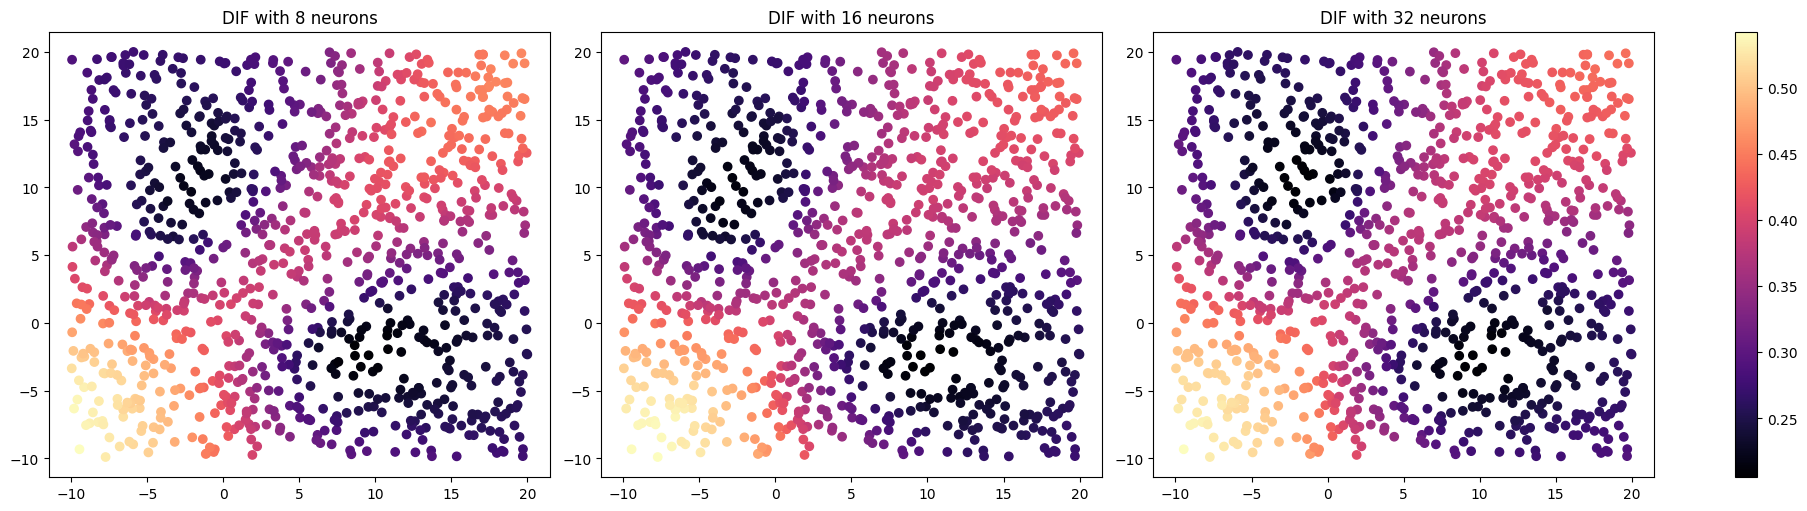

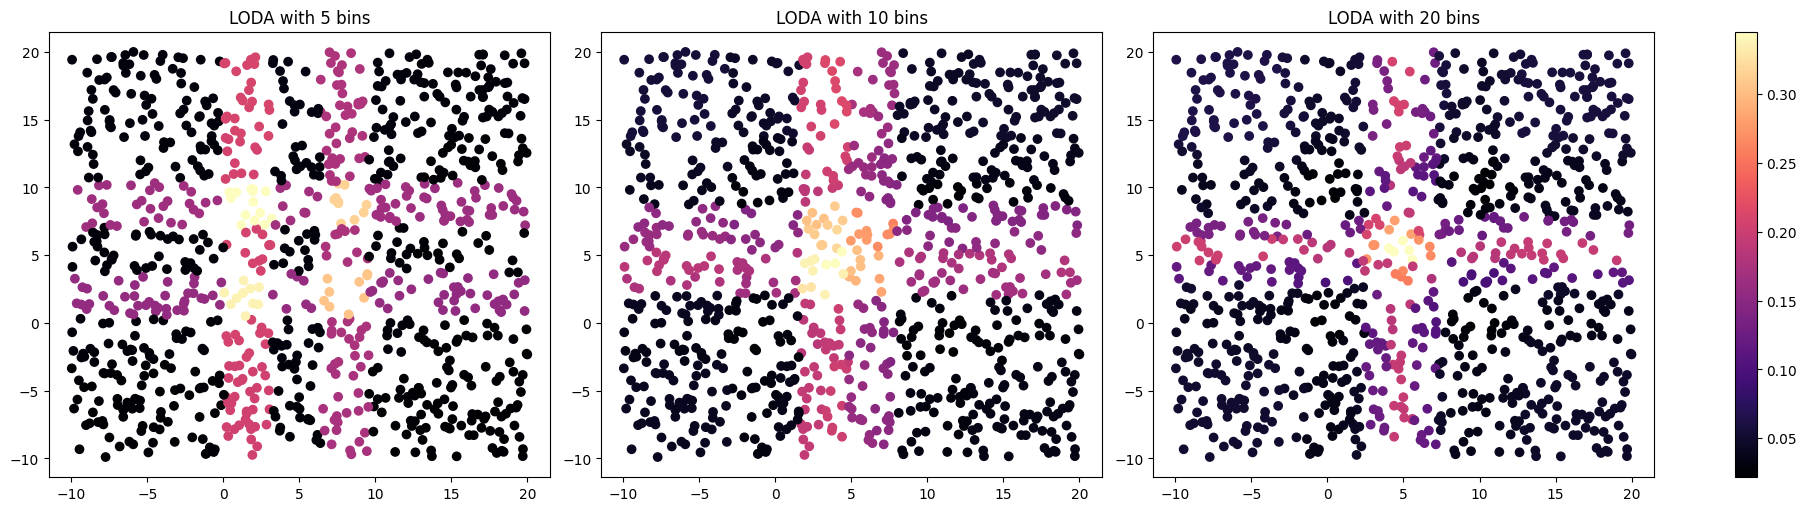

In [41]:
# Ex. 2.5
neuron_counts = [8, 16, 32]
bin_counts = [5, 10, 20]

fig_dif, axes_dif = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
for i, neurons in enumerate(neuron_counts):
    dif = DIF(contamination=0.02, hidden_neurons=[neurons])
    dif.fit(X)

    anomaly_scores_dif = dif.decision_function(test_data)

    norm = Normalize(vmin=anomaly_scores_dif.min(), vmax=anomaly_scores_dif.max())
    scatter = axes_dif[i].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_dif, cmap='magma', norm=norm)
    axes_dif[i].set_title(f"DIF with {neurons} neurons")

fig_dif.colorbar(scatter, ax=axes_dif, location='right')
plt.show()

fig_loda, axes_loda = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
for i, bins in enumerate(bin_counts):
    loda = LODA(contamination=0.02, n_bins=bins)
    loda.fit(X)

    anomaly_scores_loda = loda.decision_function(test_data)

    norm = Normalize(vmin=anomaly_scores_loda.min(), vmax=anomaly_scores_loda.max())
    scatter = axes_loda[i].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_loda, cmap='magma', norm=norm)
    axes_loda[i].set_title(f"LODA with {bins} bins")

fig_loda.colorbar(scatter, ax=axes_loda, location='right')
plt.show()


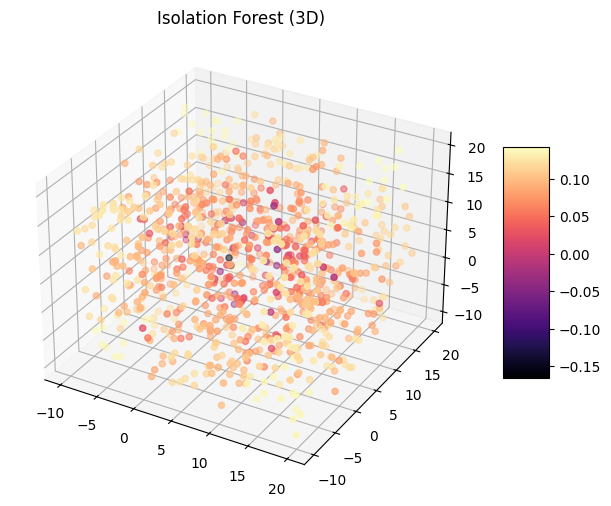

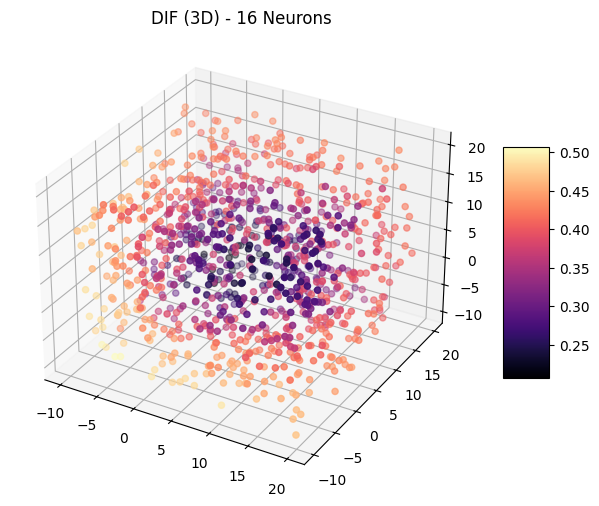

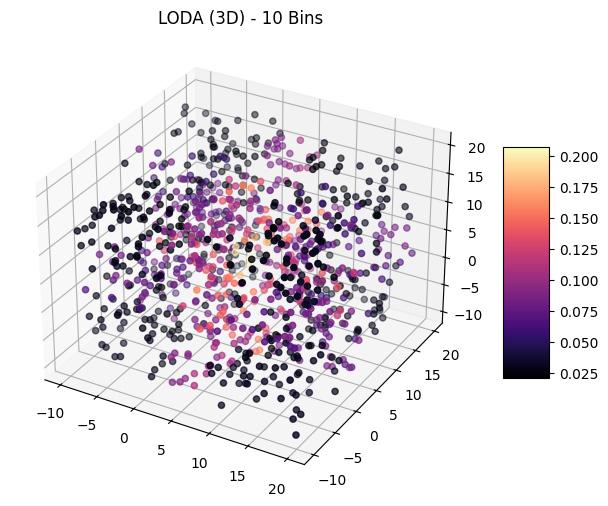

In [42]:
# Ex. 2.6
X, _ = make_blobs(n_samples=500, centers=[(0, 10, 0), (10, 0, 10)], n_features=3)

test_data_3d = np.random.uniform(-10, 20, size=(1000, 3))

def plot_3d_anomaly_scores(ax, model, data, title):
    anomaly_scores = model.decision_function(test_data_3d)
    
    norm = Normalize(vmin=anomaly_scores.min(), vmax=anomaly_scores.max())
    
    sc = ax.scatter(test_data_3d[:, 0], test_data_3d[:, 1], test_data_3d[:, 2], c=anomaly_scores, cmap='magma', norm=norm, marker='o')
    
    ax.set_title(title)
    return sc

iforest = IForest(contamination=0.02, random_state=42)
iforest.fit(X)

fig_iforest = plt.figure(figsize=(8, 6))
ax_iforest = fig_iforest.add_subplot(111, projection='3d')
sc_iforest = plot_3d_anomaly_scores(ax_iforest, iforest, X, "Isolation Forest (3D)")
fig_iforest.colorbar(sc_iforest, ax=ax_iforest, shrink=0.5, aspect=5)
plt.show()

fig_dif = plt.figure(figsize=(8, 6))
ax_dif = fig_dif.add_subplot(111, projection='3d')
neuron_count = 16
dif = DIF(contamination=0.02, hidden_neurons=[neuron_count], random_state=42)
dif.fit(X)

sc_dif = plot_3d_anomaly_scores(ax_dif, dif, X, f"DIF (3D) - {neuron_count} Neurons")
fig_dif.colorbar(sc_dif, ax=ax_dif, shrink=0.5, aspect=5)
plt.show()

fig_loda = plt.figure(figsize=(8, 6))
ax_loda = fig_loda.add_subplot(111, projection='3d')
bin_count = 10
loda = LODA(contamination=0.02, n_bins=bin_count)
loda.fit(X)

sc_loda = plot_3d_anomaly_scores(ax_loda, loda, X, f"LODA (3D) - {bin_count} Bins")
fig_loda.colorbar(sc_loda, ax=ax_loda, shrink=0.5, aspect=5)
plt.show()

In [43]:
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ex. 3.1
data = sio.loadmat("shuttle.mat")
X = data['X']
y = data['y'].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.ensemble import IsolationForest
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import contextlib
import sys
from io import StringIO

# Ex. 3.2
ba_iforest, ba_loda, ba_dif = [], [], []
roc_iforest, roc_loda, roc_dif = [], [], []

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    iforest = IsolationForest(contamination=0.1)
    iforest.fit(X_train)
    y_pred_iforest = iforest.predict(X_test)
    y_pred_iforest = np.where(y_pred_iforest == 1, 0, 1)

    loda = LODA(contamination=0.1)
    loda.fit(X_train)
    y_pred_loda = loda.predict(X_test)

    dif = DeepSVDD(n_features=X_train.shape[1], contamination=0.1)
    dif.fit(X_train)
    y_pred_dif = dif.predict(X_test)

    ba_iforest.append(balanced_accuracy_score(y_test, y_pred_iforest))
    ba_loda.append(balanced_accuracy_score(y_test, y_pred_loda))
    ba_dif.append(balanced_accuracy_score(y_test, y_pred_dif))
    
    roc_iforest.append(roc_auc_score(y_test, y_pred_iforest))
    roc_loda.append(roc_auc_score(y_test, y_pred_loda))
    roc_dif.append(roc_auc_score(y_test, y_pred_dif))

mean_ba_iforest = np.mean(ba_iforest)
mean_ba_loda = np.mean(ba_loda)
mean_ba_dif = np.mean(ba_dif)

mean_roc_iforest = np.mean(roc_iforest)
mean_roc_loda = np.mean(roc_loda)
mean_roc_dif = np.mean(roc_dif)

print("Mean Balanced Accuracy and ROC AUC for each model over 10 splits:")
print(f"IForest - BA: {mean_ba_iforest:.3f}, ROC AUC: {mean_roc_iforest:.3f}")
print(f"LODA - BA: {mean_ba_loda:.3f}, ROC AUC: {mean_roc_loda:.3f}")
print(f"DIF - BA: {mean_ba_dif:.3f}, ROC AUC: {mean_roc_dif:.3f}")

Epoch 1/100, Loss: 1276.0408961102366
Epoch 2/100, Loss: 1275.7096284925938
Epoch 3/100, Loss: 1275.8985328897834
Epoch 4/100, Loss: 1276.1387711763382
Epoch 5/100, Loss: 1275.8672519624233
Epoch 6/100, Loss: 1276.026379942894
Epoch 7/100, Loss: 1276.640183493495
Epoch 8/100, Loss: 1276.5912801921368
Epoch 9/100, Loss: 1275.9293054789305
Epoch 10/100, Loss: 1276.3278652206063
Epoch 11/100, Loss: 1275.7761050611734
Epoch 12/100, Loss: 1276.3157627135515
Epoch 13/100, Loss: 1276.4208717942238
Epoch 14/100, Loss: 1276.3071037828922
Epoch 15/100, Loss: 1275.8025864809752
Epoch 16/100, Loss: 1277.3404029756784
Epoch 17/100, Loss: 1276.1643812805414
Epoch 18/100, Loss: 1275.9565878659487
Epoch 19/100, Loss: 1276.059919565916
Epoch 20/100, Loss: 1276.3490205854177
Epoch 21/100, Loss: 1275.7845033705235
Epoch 22/100, Loss: 1277.0582565069199
Epoch 23/100, Loss: 1276.4240318387747
Epoch 24/100, Loss: 1276.0162390768528
Epoch 25/100, Loss: 1275.9776675328612
Epoch 26/100, Loss: 1276.414476558566